In [1]:
##
## Simple Linear Network and the Delta Rule
##

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as R

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

### create input training patterns and training teacher output

Np  = # training patterns<br>
nin = # input nodes

input pattern array (i) should have dimensions Np x nin

With Np=10 and nin=1, note that the original shape of i is (10,) instead of (10,1) - we need to reshape i to explicitly have dimensions (10,1)

similarity, the training teacher output array (t) should have dimensions Np x nout - we need to reshape t to explicitly have dimensions (10,1)

In [2]:
# input patterns
i = np.array([0.12, 0.16, 0.21, 0.25, 0.32, 0.39, 0.45, 0.52, 0.59, 0.68]);
nin = 1
print('original shape of i : {}'.format(i.shape))

# force i to have shape to be Np x nin
i = i.reshape((i.shape[0],nin))
print('re-shaped i : {}'.format(i.shape))

# alternatively, instead of explicitly re-shaping the array, could have defined i this way
# i = np.array([[0.12], [0.16], [0.21], [0.25], [0.32], [0.39], [0.45], [0.52], [0.59], [0.68]]);

# number of patterns
Np = i.shape[0]

# teacher outputs
t = np.array([0.34, 0.54, 0.72, 0.91, 1.21, 1.35, 1.58, 1.69, 1.80, 2.01]);
nout = 1
# force t to have shape to be Np x nout
t = t.reshape((t.shape[0],nout))

# test patterns
test = np.linspace(0, .7, 20)
# force test to have shape to be Ntest x nout
test = test.reshape((test.shape[0],nin))

original shape of i : (10,)
re-shaped i : (10, 1)


<hr>

### here we implement delta rule learning by hand

In [3]:
#########################################################################################
## delta rule learning by hand

whereas using Keras (and other toolkits) we do not need to explicitly create the input (with value 1) to the bias weight (Keras and those toolkits take care of that automatically), here we need to explicitly add those inputs

so instead of having Np x nin array, we will have an NP x (nin+1) array

In [4]:
# implementing by hand, we want to add the explicit input (with value 1) via the bias weight
idelta = np.concatenate((i, np.ones((i.shape[0],1))), axis=1)
nindelta = idelta.shape[1]

print('original input i')
print(i)
print()
print('input idelta (with column of 1s concatenated)')
print(idelta)

# need to do the same for the test inputs
testdelta = np.concatenate((test, np.ones((test.shape[0],1))), axis=1)

original input i
[[0.12]
 [0.16]
 [0.21]
 [0.25]
 [0.32]
 [0.39]
 [0.45]
 [0.52]
 [0.59]
 [0.68]]

input idelta (with column of 1s concatenated)
[[0.12 1.  ]
 [0.16 1.  ]
 [0.21 1.  ]
 [0.25 1.  ]
 [0.32 1.  ]
 [0.39 1.  ]
 [0.45 1.  ]
 [0.52 1.  ]
 [0.59 1.  ]
 [0.68 1.  ]]


note here that we initialize the weight matrix (Wdelta) to small random numbers

while this is not critical for simple delta rule learning, it will be for training most complex networks

In [5]:
# learning rate
LR = .01

# initialize weight matrix to small random values
Wdelta = .10*R.rand(nindelta,nout)-.05;

# number of training epochs
epochs = 5000

if you turn verbose to True, you can see how the error (SSE) decreases over training

note that this implements incremental learning (aka stochastic gradient descent) - weights are updated after every training pattern rather than once per epoch (or in batches)

and note that I have given code that calculates the output given the input using both matrix operations and using nested for loops (they give the same answer, but the first method is a lot faster to compute)

In [6]:
# linear activation function
def linear(net):
    return net

# initialize err array
err = np.zeros((epochs))

# if verbose, print progress
verbose = False

# loop through epochs
for N in range(epochs):
        
    # initalize output
    outdelta = np.zeros((t.shape[0],1))
    
    # shuffle order of patterns (M for remapping) - necessary for sgd
    M = R.permutation(Np)
    
    # incremental learning / stochastic gradient descent
    for p in range(Np):

        # calculate output given input p (using matrix operation in one line of code)
        outdelta[[M[p]],:] = linear(np.matmul(idelta[[M[p]],:], Wdelta))
        
        # now calculate output given input p long-hand (using a for loop instead)
        for J in range(nout):
            net = 0.
            for I in range(nindelta):
                net += idelta[M[p],I] * Wdelta[I,J]
            outdelta[M[p],J] = linear(net)
        
        # calculate error
        err[N] += np.sum((t[M[p],:]-outdelta[M[p],:])**2)
        
        # update weights
        for J in range(nout):               # loop through all output units
            for I in range(nindelta):       # loop through all intput units
                Wdelta[I,J] += LR*(t[M[p],J]-outdelta[M[p],J])*1.*idelta[M[p],I]
                
    # print current err if verbose
    if verbose:
        print(err[N])

print('Done training!')

Done training!


note that for testing, I am just presenting linearly-spaced points that span the continuum of training patterns

In [7]:
# model predictions
outdelta = np.zeros((testdelta.shape[0],1))
for p in range(testdelta.shape[0]):
    outdelta[[p],:] = linear(np.matmul(testdelta[[p],:], Wdelta))
print('Done testing!')

Done testing!


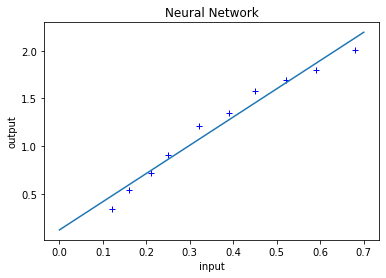

In [8]:
# plot training data and predictions
plt.plot(i,t,'b+',testdelta[:,0],outdelta[:,0])
plt.xlabel('input')
plt.ylabel('output')
plt.title('Neural Network')
plt.show()

here, the network learns a regression line, with slope W and intercept B

In [9]:
# get learned network weights and biases
print('*** delta rule by hand ***')
print('W {} | B {}'.format(Wdelta[0,0], Wdelta[1,0]))

*** delta rule by hand ***
W 2.956872951858861 | B 0.12385329886593498


<hr>

### with linear regression in scikit-learn

In [10]:
##
## basic linear regression
##

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(i, t)

# Make predictions using the testing set
out_regr = regr.predict(test)

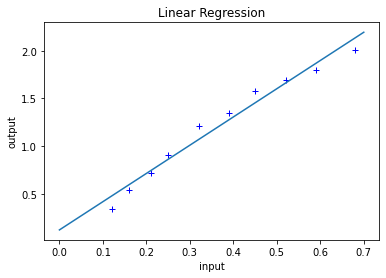

In [11]:
# plot training data and predictions
plt.plot(i,t,'b+',test,out_regr)
plt.xlabel('input')
plt.ylabel('output')
plt.title('Linear Regression')
plt.show()

In [12]:
# The coefficients
print('*** using linear regression (scikit-learn) ***')
print('slope {} | intercept {}'.format(regr.coef_, regr.intercept_))
print('Done with regression!')

*** using linear regression (scikit-learn) ***
slope [[2.95719905]] | intercept [0.12379355]
Done with regression!


<hr>

### here we implement delta rule learning in Keras

In [13]:
##
## define and train neural network - we will discuss details of these keras pieces later
##

# import tools for basic keras networks 
from tensorflow.keras import models
from tensorflow.keras import layers

nout = 1
# create architecture of simple neural network model
network = models.Sequential()
network.add(layers.Dense(nout, 
                         activation='linear', 
                         input_shape=(nin,)))

# print a model summary
print(network.summary())
print()
for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
for layer in network.layers:
    print(layer.get_config())
print()

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None

layer name : dense | input shape : (?, 1) | output shape : (?, 1)

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 1), 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [14]:
from tensorflow.keras import optimizers

# configure optimizer
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

# compile network
network.compile(optimizer=sgd, 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

# now train the network
history = network.fit(i, t, verbose=False, epochs=5000)
print('Done training!')

# model predictions
out = network.predict(test)
print('Done testing!')

Done training!
Done testing!


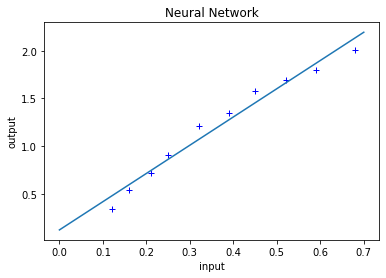

In [15]:
# plot training data and predictions
plt.plot(i,t,'b+',test,out)
plt.xlabel('input')
plt.ylabel('output')
plt.title('Neural Network')
plt.show()

In [16]:
# get learned network weights and biases
W = network.layers[0].get_weights()[0]     # weights input to hidden
B = network.layers[0].get_weights()[1]     # bias to hidden

print('*** using Keras ***')
print('W {} | B {}'.format(W[0][0], B[0]))

*** using Keras ***
W 2.9571807384490967 | B 0.12380033731460571
